In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

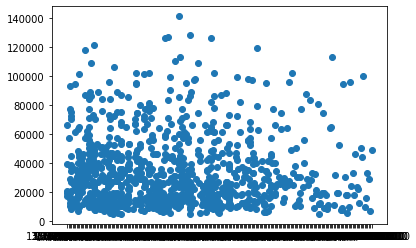

In [8]:
fig,ax=plt.subplots()
ax.scatter(df.saledate[0:1000],df["SalePrice"][0:1000]);

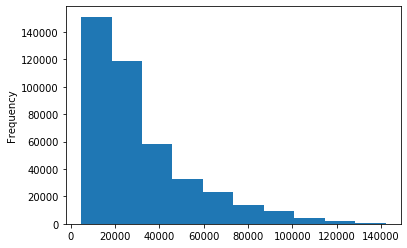

In [9]:
df.SalePrice.plot.hist()

In [10]:
df=pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [11]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

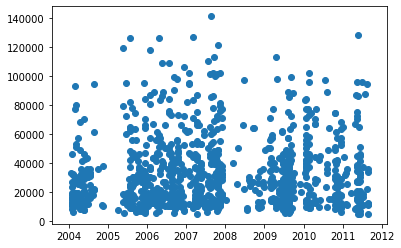

In [13]:
fig,ax=plt.subplots()
ax.scatter(df.saledate[0:1000],df["SalePrice"][0:1000]);

In [14]:
df.sort_values(by=["saledate"],ascending=True,inplace=True)

In [15]:
df.saledate.head(15)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
df_copy=df.copy()

In [17]:
df_copy["saleyear"]=df["saledate"].dt.year
df_copy["salemonth"]=df["saledate"].dt.month
df_copy["saleday"]=df["saledate"].dt.day
df_copy["saledayofweek"]=df["saledate"].dt.dayofweek
df_copy["saledayofyear"]=df["saledate"].dt.dayofyear

In [18]:
df_copy.T.tail()

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
saleyear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
salemonth,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
saleday,17,31,31,31,31,31,31,31,31,31,...,28,28,28,28,28,28,28,28,28,28
saledayofweek,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
saledayofyear,17,31,31,31,31,31,31,31,31,31,...,119,119,119,119,119,119,119,119,119,119


In [19]:
df_copy.drop("saledate",axis=1,inplace=True)

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [21]:
from sklearn.ensemble import RandomForestRegressor


In [22]:
model=RandomForestRegressor(n_jobs=-1,random_state=42)

In [23]:
model.fit(df_copy.drop("SalePrice",axis=1),df_copy["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [24]:
for label,content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label]=content.astype("category").cat.as_ordered()
        

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [26]:
df_copy["state"].head()

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
Name: state, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

In [27]:
df_copy["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
df_copy["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [29]:
df_copy["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [30]:
df_copy.T.tail()

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
saleyear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
salemonth,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
saleday,17,31,31,31,31,31,31,31,31,31,...,28,28,28,28,28,28,28,28,28,28
saledayofweek,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
saledayofyear,17,31,31,31,31,31,31,31,31,31,...,119,119,119,119,119,119,119,119,119,119


In [31]:
df_copy.to_csv("Data/bluebook-for-bulldozers/Train_Copy.csv",index=False)

In [32]:
ab=pd.read_csv("Data/bluebook-for-bulldozers/Train_Copy.csv",low_memory=False)

In [33]:
ab.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
saleyear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
salemonth,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
saleday,17,31,31,31,31,31,31,31,31,31,...,28,28,28,28,28,28,28,28,28,28
saledayofweek,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
saledayofyear,17,31,31,31,31,31,31,31,31,31,...,119,119,119,119,119,119,119,119,119,119


In [34]:
df_copy["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [35]:
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [36]:
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [37]:
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_copy[label+"is missing"]=pd.isnull(content)
            df_copy[label]=content.fillna(content.median())

In [38]:
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [39]:
df_copy["auctioneerIDis missing"].value_counts()

False    392562
True      20136
Name: auctioneerIDis missing, dtype: int64

In [40]:
for label,content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
pd.Categorical(df_copy["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [42]:
pd.Categorical(df_copy["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=True)

In [43]:
pd.Categorical(df_copy["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [44]:
for label,content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
            df_copy[label+"is missing"]=pd.isnull(content)
            df_copy[label]=pd.Categorical(content).codes+1

In [45]:
pd.Categorical(df_copy["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [46]:
pd.Categorical(df_copy["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [47]:
pd.Categorical(df_copy["UsageBandis missing"]).codes

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [48]:
pd.Categorical(df_copy["UsageBandis missing"]).dtype

CategoricalDtype(categories=[False, True], ordered=False)

In [49]:
(df_copy["UsageBandis missing"]).head()

205615    True
274835    True
141296    True
212552    True
62755     True
Name: UsageBandis missing, dtype: bool

In [50]:
df_copy.state.dtype

dtype('int8')

In [51]:
for label,content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 101.1 MB


In [53]:
df_copy.state

205615    44
274835     9
141296     9
212552     9
62755      9
          ..
410879     5
412476     5
411927     5
407124     5
409203     5
Name: state, Length: 412698, dtype: int8

In [54]:
pd.Categorical(df_copy["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [55]:
df_copy.state

205615    44
274835     9
141296     9
212552     9
62755      9
          ..
410879     5
412476     5
411927     5
407124     5
409203     5
Name: state, Length: 412698, dtype: int8

In [56]:
len(df_copy)

412698

In [57]:
%%time

model=RandomForestRegressor(n_jobs=-1,random_state=42)

model.fit(df_copy.drop("SalePrice",axis=1),df_copy["SalePrice"])

Wall time: 4min 53s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [58]:
model.score(df_copy.drop("SalePrice",axis=1),df_copy["SalePrice"])

0.9875468079970563

In [59]:
df_val=df_copy[df_copy.saleyear==2012]
df_train=df_copy[df_copy.saleyear<2012]

In [60]:
len(df_val),len(df_train)

(11573, 401125)

In [61]:
x_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_val,y_val=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

In [62]:
x_val.shape,y_val.shape,x_train.shape,y_train.shape

((11573, 102), (11573,), (401125, 102), (401125,))

In [63]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    return (mean_squared_log_error(y_test,y_preds)**0.5)

def show_scores(model):
    train_score=model.predict(x_train)
    val_score=model.predict(x_val)
    scores={"Train MAE":mean_absolute_error(y_train,train_score),
             "Valid MAE":mean_absolute_error(y_val,val_score),
              "Train RMSLE":rmsle(y_train,train_score),
              "Valid RMSLE":rmsle(y_val,val_score),
               "Train R^2 Score":r2_score(y_train,train_score),
               "Valid R^2 Score":r2_score(y_val,val_score)}
    return scores
    
    

In [64]:
len(x_train)

401125

In [65]:
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [66]:
%%time
model.fit(x_train,y_train)

Wall time: 11 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [67]:
show_scores(model)

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Train RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Train R^2 Score': 0.8606658995199189,
 'Valid R^2 Score': 0.8320374995090507}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid={"n_estimators":np.arange(10,100,10),
          "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":[0.5,1,"sqrt","auto"],
          "max_samples":[10000]}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2,
                            cv=5,
                            verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [70]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [71]:
show_scores(rs_model)

{'Train MAE': 6997.874694463792,
 'Valid MAE': 8062.799478525045,
 'Train RMSLE': 0.31149196442293065,
 'Valid RMSLE': 0.3266960341368849,
 'Train R^2 Score': 0.7936616293154599,
 'Valid R^2 Score': 0.7981417211492632}

In [72]:
show_scores(model)

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Train RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Train R^2 Score': 0.8606658995199189,
 'Valid R^2 Score': 0.8320374995090507}

In [73]:
%%time
ideal_model=RandomForestRegressor(n_jobs=-1,n_estimators=40,min_samples_leaf=1,min_samples_split=14,max_features=0.5,max_samples=None)

ideal_model.fit(x_train,y_train)

Wall time: 1min


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
show_scores(ideal_model)

{'Train MAE': 2955.4561683111174,
 'Valid MAE': 5941.767953540891,
 'Train RMSLE': 0.14467744328945265,
 'Valid RMSLE': 0.24509608676965225,
 'Train R^2 Score': 0.9588637785438581,
 'Valid R^2 Score': 0.8823559722217705}

In [75]:
df_test=pd.read_csv("Data/bluebook-for-bulldozers/Test.csv")

In [76]:
df_test1=pd.read_csv("Data/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])

In [77]:
df_test1.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [78]:
df_test1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456
SalesID,1227829,1227844,1227847,1227848,1227863,1227870,1227871,1227879,1227880,1227881,...,6643158,6643164,6643167,6643168,6643170,6643171,6643173,6643184,6643186,6643196
MachineID,1006309,1022817,1031560,56204,1053887,1068694,1012262,1064696,1067175,1007429,...,2556488,1894070,2558314,2558315,2558316,2558317,2558332,2558342,2558343,2558346
ModelID,3168,7271,22805,1269,22312,16747,9133,4699,22145,423,...,21434,21438,21450,21450,21450,21450,21434,21437,21437,21446
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,99,99,2,2,2,2,2,2,2,2


In [79]:
df_test1["saleyear"]=df_test1["saledate"].dt.year
df_test1["salemonth"]=df_test1["saledate"].dt.month
df_test1["saleday"]=df_test1["saledate"].dt.day
df_test1["saledayofweek"]=df_test1["saledate"].dt.dayofweek
df_test1["saledayofyear"]=df_test1["saledate"].dt.dayofyear
df_test1.drop("saledate",axis=1,inplace=True)



for label,content in df_test1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test1[label+"is missing"]=pd.isnull(content)
            df_test1[label]=content.fillna(content.median())
            
for label,content in df_test1.items():
    if not pd.api.types.is_numeric_dtype(content):
            df_test1[label+"is missing"]=pd.isnull(content)
            df_test1[label]=pd.Categorical(content).codes+1

In [83]:
x_train.shape

(401125, 102)

In [82]:
df_test1.shape

(12457, 101)

In [85]:
df_copy.shape

(412698, 103)

In [86]:
set(x_train.columns)-set(df_test1.columns)

{'auctioneerIDis missing'}

In [87]:
df_test1["auctioneerIDioneerIDis missing"]=False

In [88]:
df_test1.shape

(12457, 102)

In [89]:
test_pred=ideal_model.predict(df_test1)

In [90]:
test_pred

array([18471.95936153, 20252.35962881, 51045.97585453, ...,
       15471.33963585, 19522.50230452, 30381.87672625])

In [91]:
len(test_pred)

12457

In [92]:

price_pred=pd.DataFrame()
price_pred["salesID"]=df_test1["SalesID"]
price_pred["Price"]=test_pred

In [93]:
price_pred

,salesID,Price
0,1227829,18471.959362
1,1227844,20252.359629
2,1227847,51045.975855
3,1227848,63230.250284
4,1227863,50541.814237
...,...,...
12452,6643171,44784.339745
12453,6643173,16288.938148
12454,6643184,15471.339636
12455,6643186,19522.502305


In [94]:
price_pred.to_csv("Data/bluebook-for-bulldozers/Test-Prediction.csv",index=False)

## Feature Importance

In [95]:
ideal_model.feature_importances_

array([3.44031165e-02, 1.71874293e-02, 4.54755028e-02, 1.88274701e-03,
       3.30130062e-03, 2.07192356e-01, 3.10929635e-03, 9.97940407e-04,
       3.97473928e-02, 5.13406141e-02, 5.64307806e-02, 4.50096870e-03,
       1.36543261e-02, 1.71302615e-01, 4.51429757e-02, 5.99666442e-03,
       2.72752989e-03, 3.23602111e-03, 4.39381643e-03, 6.24013568e-02,
       4.83890066e-04, 4.93378013e-05, 1.69665653e-03, 1.41319192e-04,
       8.28430859e-04, 4.15938044e-04, 1.11242878e-04, 1.07943456e-02,
       8.53666655e-04, 2.16750919e-03, 3.49740409e-03, 2.01277826e-03,
       2.74830148e-03, 6.16611753e-03, 2.74769971e-04, 1.25120525e-02,
       8.91074430e-04, 9.20459662e-03, 3.03606191e-03, 2.48458982e-03,
       8.53603519e-04, 9.09044735e-04, 2.58243328e-03, 6.02021977e-04,
       4.45999378e-04, 3.65121795e-04, 3.26437125e-04, 1.67801194e-03,
       1.05124842e-03, 2.55483929e-04, 3.19246140e-04, 7.36989080e-02,
       3.77119594e-03, 5.65164159e-03, 2.89543880e-03, 9.83422578e-03,
      

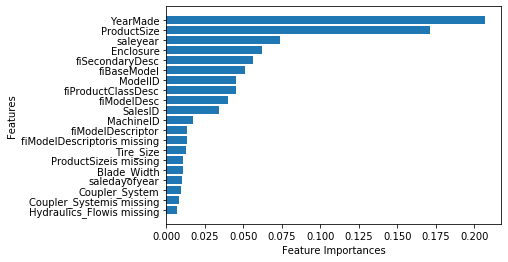

In [110]:
df=(pd.DataFrame({"Features":x_train.columns, "Feature Importances":ideal_model.feature_importances_})
    .sort_values("Feature Importances",ascending=False).reset_index(drop=True))

             
fig,ax=plt.subplots()
ax.barh(df["Features"][:20],df["Feature Importances"][:20])
ax.set_ylabel("Features")
ax.set_xlabel("Feature Importances")
ax.invert_yaxis()


#                                THE END :)